Problem Set 1  - Mert Akman
BUSI 525

In [11]:
#Simulation Part 0  
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

N = 1000 
T = 120 
mean_market = 0.05
vol_market = 0.2 
res_vol = 0.1 
month_mean_market = mean_market / 12 
month_std_market = vol_market / np.sqrt(12) 
month_res_vol = res_vol / np.sqrt(12) 

market_returns = np.random.normal(month_mean_market, month_std_market, T)



In [12]:
# Part 1.1
beta = 1 
alpha = 0 
funds_data = {
    'alpha': np.zeros(N),
    't_stat': np.zeros(N),
    'p_value': np.zeros(N)
}
# Simulation for each fund
for i in range(N):
    fund_returns = alpha + beta * market_returns + np.random.normal(0, month_std_market, T)
    
    X = sm.add_constant(market_returns)
    
    model = sm.OLS(fund_returns, X).fit()
    
    funds_data['alpha'][i] = model.params[0]
    funds_data['t_stat'][i] = model.tvalues[0]
    funds_data['p_value'][i] = model.pvalues[0]

significant_alphas = np.sum(funds_data['p_value'] < 0.05)
print("Number of funds that are skilled: ")
significant_alphas


Number of funds that are skilled: 


50

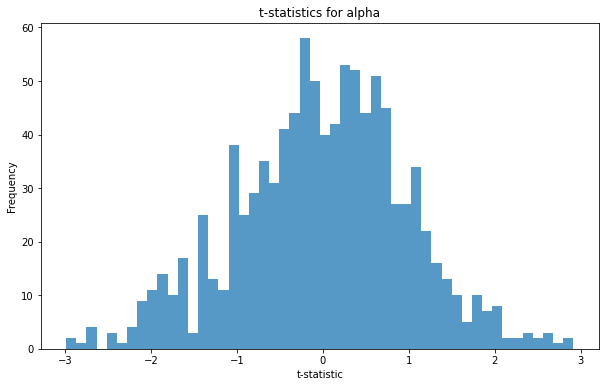

In [13]:
# Part 1.2 - Plot the distribution of t-stats for alpha
plt.figure(figsize=(10, 6))
plt.hist(funds_data['t_stat'], bins=50, alpha=0.75)
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('t-statistics for alpha')
plt.show()



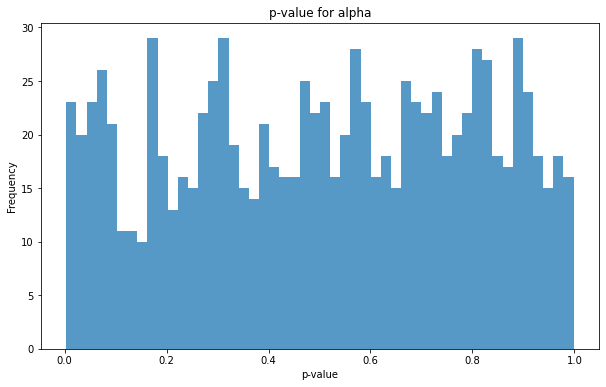

In [14]:
# Part 1.2 - Plot the distribution of p-values for alpha
plt.figure(figsize=(10, 6))
plt.hist(funds_data['p_value'], bins=50, alpha=0.75)
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('p-value for alpha')
plt.show()

Part 1.3 -- The distribution of p-values look like an uniform from 0 to 1. Each p-value is equally likely. Once I have the enough sample, I can conclude that each bin of the histogram should contain the same number of p-values. 

In [15]:
# Part 2.1 : Let's add some skill to the true underlying distribution
# One Lambda 
N = 1000
beta = 1 
alpha = 0
skilled_alpha = 0.05/12
lambda_val = 0.1

funds_data = {
    'alpha': np.zeros(int(N*(1-lambda_val))),
    't_stat': np.zeros(int(N*(1-lambda_val))),
    'p_value': np.zeros(int(N*(1-lambda_val)))
}

funds_data_skilled = {
    'alpha': np.zeros(int(N*lambda_val)),
    't_stat': np.zeros(int(N*lambda_val)),
    'p_value': np.zeros(int(N*lambda_val))
}

# Simulation for each fund
for i in range(int(N*(1-lambda_val))):
    fund_returns = alpha + beta * market_returns + np.random.normal(0, month_std_market, T)
    
    X = sm.add_constant(market_returns)
    
    model = sm.OLS(fund_returns, X).fit()
    
    funds_data['alpha'][i] = model.params[0]
    funds_data['t_stat'][i] = model.tvalues[0]
    funds_data['p_value'][i] = model.pvalues[0]

for i in range(int(N*lambda_val)):
    fund_returns = skilled_alpha + beta * market_returns + np.random.normal(0, month_std_market, T)
    
    X = sm.add_constant(market_returns)
    
    model = sm.OLS(fund_returns, X).fit()
    
    funds_data_skilled['alpha'][i] = model.params[0]
    funds_data_skilled['t_stat'][i] = model.tvalues[0]
    funds_data_skilled['p_value'][i] = model.pvalues[0]


combined_data = (
    np.concatenate((funds_data['alpha'], funds_data_skilled['alpha'])),
    np.concatenate((funds_data['t_stat'], funds_data_skilled['t_stat'])),
    np.concatenate((funds_data['p_value'], funds_data_skilled['p_value']))
)




In [16]:
# Define the significance level
alpha_significance_level = 0.05

# Calculate True Positives (TP) and False Negatives (FN)
TP = np.sum(funds_data_skilled['p_value'] < alpha_significance_level)
FN = np.sum(funds_data_skilled['p_value'] >= alpha_significance_level)

# Calculate False Positives (FP) and True Negatives (TN)
FP = np.sum(funds_data['p_value'] < alpha_significance_level)
TN = np.sum(funds_data['p_value'] >= alpha_significance_level)

# Calculate the total number of skilled and unskilled funds
total_skilled = int(N*lambda_val)
total_unskilled = N - total_skilled


Lambda value: 0.1
True Positives (Skilled funds correctly identified): 10 (1.00%)
False Negatives (Skilled funds not identified): 90 (9.00%)
False Positives (Unskilled funds incorrectly identified as skilled): 49 (4.90%)
True Negatives (Unskilled funds correctly identified as unskilled): 851 (85.10%)


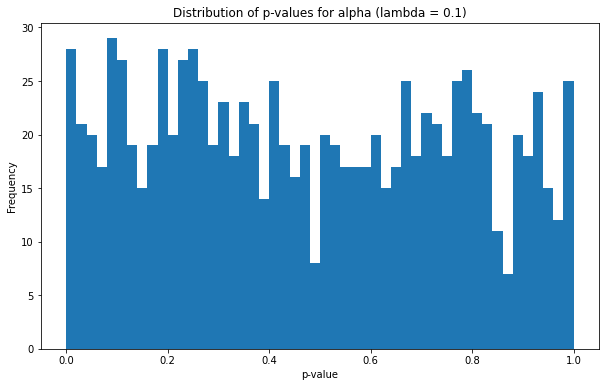

Lambda value: 0.25
True Positives (Skilled funds correctly identified): 30 (3.00%)
False Negatives (Skilled funds not identified): 220 (22.00%)
False Positives (Unskilled funds incorrectly identified as skilled): 27 (2.70%)
True Negatives (Unskilled funds correctly identified as unskilled): 723 (72.30%)


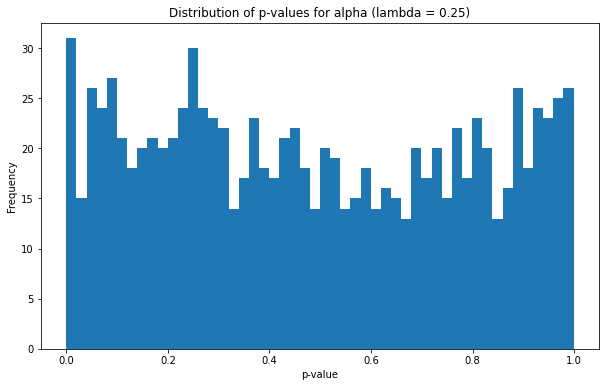

Lambda value: 0.5
True Positives (Skilled funds correctly identified): 57 (5.70%)
False Negatives (Skilled funds not identified): 443 (44.30%)
False Positives (Unskilled funds incorrectly identified as skilled): 26 (2.60%)
True Negatives (Unskilled funds correctly identified as unskilled): 474 (47.40%)


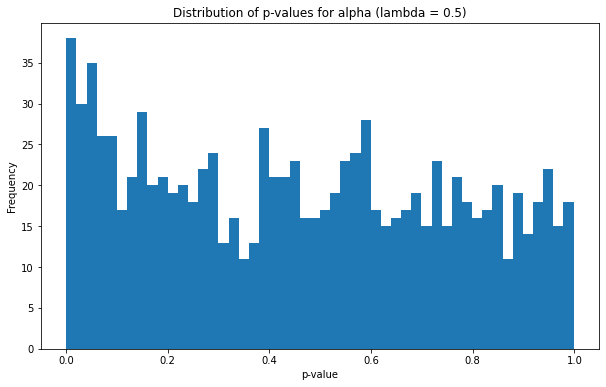

Lambda value: 0.75
True Positives (Skilled funds correctly identified): 91 (9.10%)
False Negatives (Skilled funds not identified): 659 (65.90%)
False Positives (Unskilled funds incorrectly identified as skilled): 17 (1.70%)
True Negatives (Unskilled funds correctly identified as unskilled): 233 (23.30%)


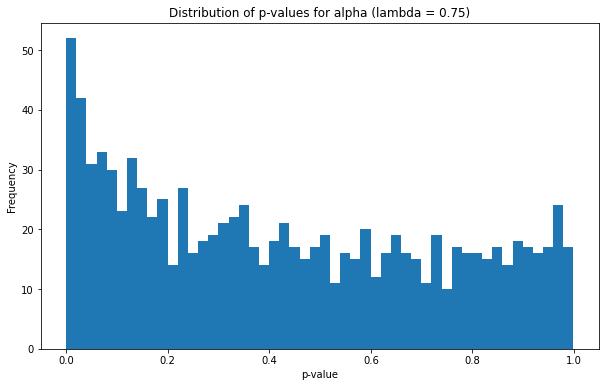

In [17]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Part 2.1 and 2.2 : Main
# Lambda in a loop

lambda_values = [0.1, 0.25, 0.5, 0.75]
N = 1000
beta = 1 
alpha = 0
skilled_alpha = 0.05/12
T = 120  # Assuming T is defined as the number of time periods

for lambda_val in lambda_values:
    # Data structures for unskilled funds
    funds_data = {
        'alpha': np.zeros(int(N*(1-lambda_val))),
        't_stat': np.zeros(int(N*(1-lambda_val))),
        'p_value': np.zeros(int(N*(1-lambda_val)))
    }

    # Data structures for skilled funds
    funds_data_skilled = {
        'alpha': np.zeros(int(N*lambda_val)),
        't_stat': np.zeros(int(N*lambda_val)),
        'p_value': np.zeros(int(N*lambda_val))
    }

    # Simulation for unskilled funds
    for i in range(int(N*(1-lambda_val))):
        fund_returns = alpha + beta * market_returns + np.random.normal(0, month_std_market, T)
        X = sm.add_constant(market_returns)
        model = sm.OLS(fund_returns, X).fit()
        funds_data['alpha'][i] = model.params[0]
        funds_data['t_stat'][i] = model.tvalues[0]
        funds_data['p_value'][i] = model.pvalues[0]

    # Simulation for skilled funds
    for i in range(int(N*lambda_val)):
        fund_returns = skilled_alpha + beta * market_returns + np.random.normal(0, month_std_market, T)
        X = sm.add_constant(market_returns)
        model = sm.OLS(fund_returns, X).fit()
        funds_data_skilled['alpha'][i] = model.params[0]
        funds_data_skilled['t_stat'][i] = model.tvalues[0]
        funds_data_skilled['p_value'][i] = model.pvalues[0]

    # Pool the data for both unskilled and skilled
    combined_data = (
        np.concatenate((funds_data['alpha'], funds_data_skilled['alpha'])),
        np.concatenate((funds_data['t_stat'], funds_data_skilled['t_stat'])),
        np.concatenate((funds_data['p_value'], funds_data_skilled['p_value']))
    )

    total_skilled = int(N*lambda_val)
    total_unskilled = N - total_skilled

    #Confusion Matrix
    # True Positives (TP) and False Negatives (FN)
    TP = np.sum(funds_data_skilled['p_value'] < alpha_significance_level)
    FN = np.sum(funds_data_skilled['p_value'] >= alpha_significance_level)
    # False Positives (FP) and True Negatives (TN)
    FP = np.sum(funds_data['p_value'] < alpha_significance_level)
    TN = np.sum(funds_data['p_value'] >= alpha_significance_level)
    
    
    print(f"Lambda value: {lambda_val}")
    print(f"True Positives (Skilled funds correctly identified): {TP} ({TP/(total_skilled+total_unskilled):.2%})")
    print(f"False Negatives (Skilled funds not identified): {FN} ({FN/(total_skilled+total_unskilled):.2%})")
    print(f"False Positives (Unskilled funds incorrectly identified as skilled): {FP} ({FP/(total_skilled+total_unskilled):.2%})")
    print(f"True Negatives (Unskilled funds correctly identified as unskilled): {TN} ({TN/(total_skilled+total_unskilled):.2%})")

    
    plt.figure(figsize=(10, 6))
    plt.hist(combined_data[2], bins=50)
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of p-values for alpha (lambda = {lambda_val})')
    plt.show()



    


As we increase the lambda, we can conclude that the p-distribution becomes slightly more rightly skewed. As we increase the lambda parameter, we are more likely to reject the null that investor is not skilled which is consistent with our initial assumption. 